## Load necessary modules

In [1]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

from keras_retinanet.bin.train import main

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time
import sys

# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf

def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.Session(config=config)

# use this environment flag to change which GPU to use
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# set the modified tf session as backend in keras
keras.backend.tensorflow_backend.set_session(get_session())

Using TensorFlow backend.


In [ ]:
sys.argv = ['--no-weights', '--epochs', '30', '--steps','300','--backbone','vgg16','--batch-size','64','--random-transform','--weighted-average', 'kitti', '../LocalDataSet/']
history = main(sys.argv)

keras_retinanet/bin/train.py:356: UserWarning: Using experimental backbone vgg16. Only resnet50 has been properly tested.
  warnings.warn('Using experimental backbone {}. Only resnet50 has been properly tested.'.format(parsed_args.backbone))


Creating model, this may take a second...
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 6 1792        input_7[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, None, None, 6 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, None, None, 6 0           block1_conv2[0][0]               
___________________________________________________________________

Epoch 1/30


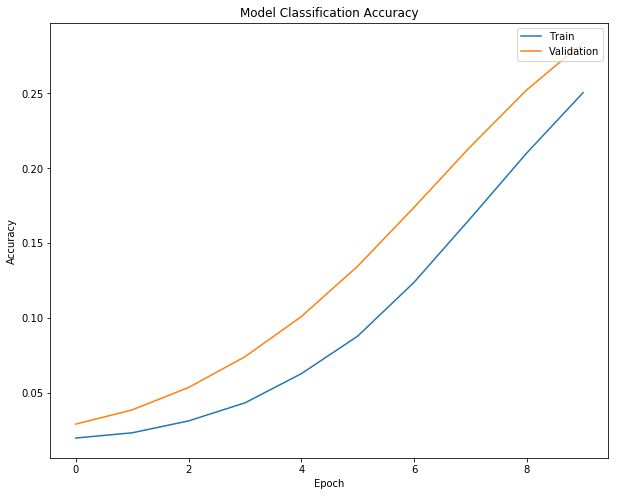

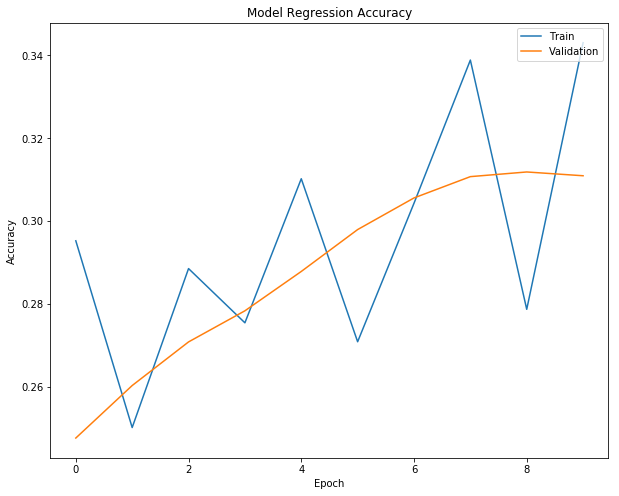

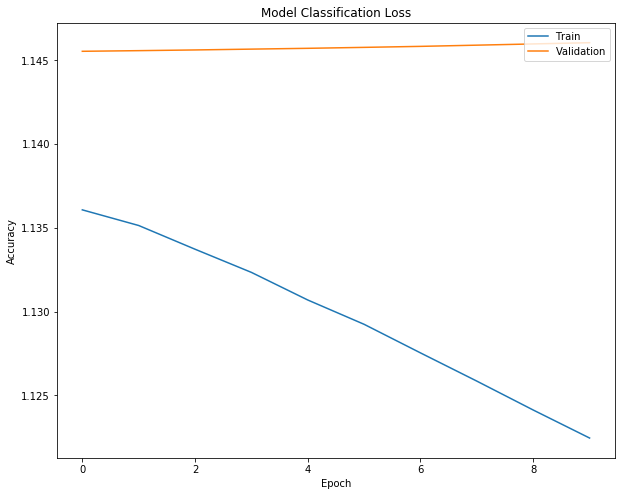

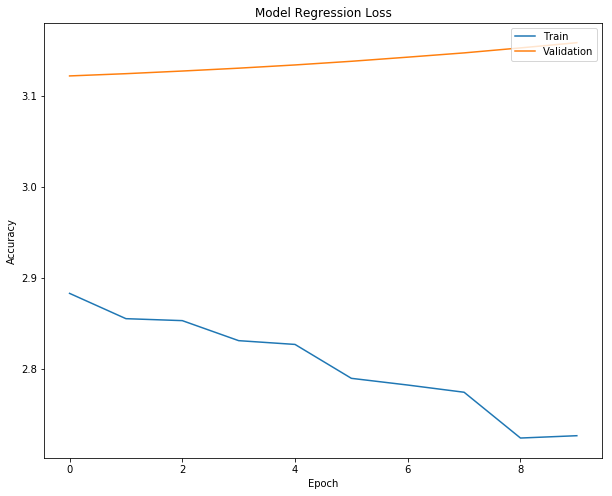

In [9]:
# YOUR CODE HERE

#  "Accuracy"
fig = plt.figure(figsize=(10,8))
plt.plot(history.history['classification_acc'])
plt.plot(history.history['val_classification_acc'])
plt.title('Model Classification Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

fig = plt.figure(figsize=(10,8))
plt.plot(history.history['regression_acc'])
plt.plot(history.history['val_regression_acc'])
plt.title('Model Regression Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# "Loss"
fig = plt.figure(figsize=(10,8))
plt.plot(history.history['classification_loss'])
plt.plot(history.history['val_classification_loss'])
plt.title('Model Classification Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

fig = plt.figure(figsize=(10,8))
plt.plot(history.history['regression_loss'])
plt.plot(history.history['val_regression_loss'])
plt.title('Model Regression Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## Load RetinaNet model

In [2]:
# adjust this to point to your downloaded/trained model
# models can be downloaded here: https://github.com/fizyr/keras-retinanet/releases
model_path = os.path.join('resnet50_30_500_nofreeze.h5')

# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')

# if the model is not converted to an inference model, use the line below
# see: https://github.com/fizyr/keras-retinanet#converting-a-training-model-to-inference-model
#model = models.convert_model(model)

#print(model.summary())

# load label to names mapping for visualization purposes
labels_to_names = {0: 'Car', 1: 'Van', 2: 'Truck', 3: 'Pedestrian', 4: 'Person_sitting', 5: 'Cyclist', 6: 'Tram', 7: 'Misc', 8: 'DontCare'}

/home/renjith/anaconda3/envs/dml/lib/python2.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


## Run detection on example

In [6]:
import cv2
vidcap = cv2.VideoCapture('../../sherbrooke_video.avi')
frame_width = int(vidcap.get(3))
frame_height = int(vidcap.get(4))
out = cv2.VideoWriter('../../outpy.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 16, (frame_width,frame_height))
success,image = vidcap.read()
count = 0
while success:
    cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file      
    success,image = vidcap.read()
    print('Read a new frame: ', success)
    # load image
#     image = read_image_bgr('./images/000000.png')

    # copy to draw on
    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

    # preprocess image for network
    image = preprocess_image(image)
    image, scale = resize_image(image)

    # process image
    start = time.time()
    boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
    print("processing time: ", time.time() - start)

    # correct for image scale
    boxes /= scale

    # visualize detections
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        # scores are sorted so we can break
        if score < 0.5:
            break

        color = label_color(label)

        b = box.astype(int)
        draw_box(draw, b, color=color)

        caption = "{} {:.3f}".format(labels_to_names[label], score)
        draw_caption(draw, b, caption)
    out.write(draw)

('Read a new frame: ', True)
('processing time: ', 4.11863899230957)
('Read a new frame: ', True)
('processing time: ', 3.7165369987487793)
('Read a new frame: ', True)
('processing time: ', 3.7869861125946045)
('Read a new frame: ', True)
('processing time: ', 3.723252058029175)
('Read a new frame: ', True)
('processing time: ', 3.720541000366211)
('Read a new frame: ', True)
('processing time: ', 3.7425169944763184)
('Read a new frame: ', True)
('processing time: ', 3.7318599224090576)
('Read a new frame: ', True)
('processing time: ', 3.728209972381592)
('Read a new frame: ', True)
('processing time: ', 3.7387380599975586)
('Read a new frame: ', True)
('processing time: ', 3.7198989391326904)
('Read a new frame: ', True)
('processing time: ', 3.9541850090026855)
('Read a new frame: ', True)
('processing time: ', 4.419950008392334)
('Read a new frame: ', True)
('processing time: ', 3.810534954071045)
('Read a new frame: ', True)
('processing time: ', 3.9801981449127197)
('Read a new 

('processing time: ', 4.1020729541778564)
('Read a new frame: ', True)
('processing time: ', 4.16872501373291)
('Read a new frame: ', True)
('processing time: ', 3.8640758991241455)
('Read a new frame: ', True)
('processing time: ', 4.0704779624938965)
('Read a new frame: ', True)
('processing time: ', 4.396426200866699)
('Read a new frame: ', True)
('processing time: ', 4.311686992645264)
('Read a new frame: ', True)
('processing time: ', 5.908102989196777)
('Read a new frame: ', True)
('processing time: ', 3.9308090209960938)
('Read a new frame: ', True)
('processing time: ', 4.096323013305664)
('Read a new frame: ', True)
('processing time: ', 4.116179943084717)
('Read a new frame: ', True)
('processing time: ', 4.051051139831543)
('Read a new frame: ', True)
('processing time: ', 4.189785003662109)
('Read a new frame: ', True)
('processing time: ', 4.239126920700073)
('Read a new frame: ', True)
('processing time: ', 3.9555790424346924)
('Read a new frame: ', True)
('processing tim

('processing time: ', 4.6914801597595215)
('Read a new frame: ', True)
('processing time: ', 4.926554918289185)
('Read a new frame: ', True)
('processing time: ', 4.545006036758423)
('Read a new frame: ', True)
('processing time: ', 6.280158042907715)
('Read a new frame: ', True)
('processing time: ', 6.080188989639282)
('Read a new frame: ', True)
('processing time: ', 6.010379076004028)
('Read a new frame: ', True)
('processing time: ', 6.108066082000732)
('Read a new frame: ', True)
('processing time: ', 5.993064880371094)
('Read a new frame: ', True)
('processing time: ', 6.081916093826294)
('Read a new frame: ', True)
('processing time: ', 6.182801008224487)
('Read a new frame: ', True)
('processing time: ', 6.31170392036438)
('Read a new frame: ', True)
('processing time: ', 6.207950830459595)
('Read a new frame: ', True)
('processing time: ', 6.205019950866699)
('Read a new frame: ', True)
('processing time: ', 5.980196952819824)
('Read a new frame: ', True)
('processing time: '

('processing time: ', 5.328856945037842)
('Read a new frame: ', True)
('processing time: ', 5.380676984786987)
('Read a new frame: ', True)
('processing time: ', 5.354119777679443)
('Read a new frame: ', True)
('processing time: ', 5.352349042892456)
('Read a new frame: ', True)
('processing time: ', 5.0059709548950195)
('Read a new frame: ', True)
('processing time: ', 4.964450836181641)
('Read a new frame: ', True)
('processing time: ', 5.100787878036499)
('Read a new frame: ', True)
('processing time: ', 4.977622985839844)
('Read a new frame: ', True)
('processing time: ', 5.0838000774383545)
('Read a new frame: ', True)
('processing time: ', 4.97002100944519)
('Read a new frame: ', True)
('processing time: ', 5.570802211761475)
('Read a new frame: ', True)
('processing time: ', 5.402768135070801)
('Read a new frame: ', True)
('processing time: ', 5.091238975524902)
('Read a new frame: ', True)
('processing time: ', 5.071265935897827)
('Read a new frame: ', True)
('processing time: 

('processing time: ', 4.166109800338745)
('Read a new frame: ', True)
('processing time: ', 5.098987102508545)
('Read a new frame: ', True)
('processing time: ', 5.82688307762146)
('Read a new frame: ', True)
('processing time: ', 4.668524980545044)
('Read a new frame: ', True)
('processing time: ', 4.68902587890625)
('Read a new frame: ', True)
('processing time: ', 5.607497215270996)
('Read a new frame: ', True)
('processing time: ', 4.028572082519531)
('Read a new frame: ', True)
('processing time: ', 4.411220073699951)
('Read a new frame: ', True)
('processing time: ', 4.485591888427734)
('Read a new frame: ', True)
('processing time: ', 4.2786078453063965)
('Read a new frame: ', True)
('processing time: ', 4.08105993270874)
('Read a new frame: ', True)
('processing time: ', 3.9593729972839355)
('Read a new frame: ', True)
('processing time: ', 4.006371974945068)
('Read a new frame: ', True)
('processing time: ', 3.9632809162139893)
('Read a new frame: ', True)
('processing time: '

('processing time: ', 4.649717092514038)
('Read a new frame: ', True)
('processing time: ', 4.960996150970459)
('Read a new frame: ', True)
('processing time: ', 5.1140758991241455)
('Read a new frame: ', True)
('processing time: ', 4.908524990081787)
('Read a new frame: ', True)
('processing time: ', 4.148086071014404)
('Read a new frame: ', True)
('processing time: ', 4.118925094604492)
('Read a new frame: ', True)
('processing time: ', 4.163794994354248)
('Read a new frame: ', True)
('processing time: ', 3.9714059829711914)
('Read a new frame: ', True)
('processing time: ', 4.0467798709869385)
('Read a new frame: ', True)
('processing time: ', 3.984386920928955)
('Read a new frame: ', True)
('processing time: ', 4.009983062744141)
('Read a new frame: ', True)
('processing time: ', 3.9694979190826416)
('Read a new frame: ', True)
('processing time: ', 4.027148962020874)
('Read a new frame: ', True)
('processing time: ', 4.291858196258545)
('Read a new frame: ', True)
('processing tim

('processing time: ', 4.033384084701538)
('Read a new frame: ', True)
('processing time: ', 4.139775991439819)
('Read a new frame: ', True)
('processing time: ', 3.9966909885406494)
('Read a new frame: ', True)
('processing time: ', 4.017452955245972)
('Read a new frame: ', True)
('processing time: ', 4.0146119594573975)
('Read a new frame: ', True)
('processing time: ', 4.030604124069214)
('Read a new frame: ', True)
('processing time: ', 4.327615022659302)
('Read a new frame: ', True)
('processing time: ', 4.266345977783203)
('Read a new frame: ', True)
('processing time: ', 4.0873939990997314)
('Read a new frame: ', True)
('processing time: ', 4.126357078552246)
('Read a new frame: ', True)
('processing time: ', 4.123829126358032)
('Read a new frame: ', True)
('processing time: ', 3.976485013961792)
('Read a new frame: ', True)
('processing time: ', 4.024585008621216)
('Read a new frame: ', True)
('processing time: ', 4.332912921905518)
('Read a new frame: ', True)
('processing time

('processing time: ', 4.189026117324829)
('Read a new frame: ', True)
('processing time: ', 4.084161043167114)
('Read a new frame: ', True)
('processing time: ', 3.9462270736694336)
('Read a new frame: ', True)
('processing time: ', 4.0331199169158936)
('Read a new frame: ', True)
('processing time: ', 3.961418867111206)
('Read a new frame: ', True)
('processing time: ', 3.892564058303833)
('Read a new frame: ', True)
('processing time: ', 5.764798164367676)
('Read a new frame: ', True)
('processing time: ', 3.9493980407714844)
('Read a new frame: ', True)
('processing time: ', 4.183409929275513)
('Read a new frame: ', True)
('processing time: ', 4.05293083190918)
('Read a new frame: ', True)
('processing time: ', 3.953277826309204)
('Read a new frame: ', True)
('processing time: ', 4.032181024551392)
('Read a new frame: ', True)
('processing time: ', 3.972443103790283)
('Read a new frame: ', True)
('processing time: ', 4.12900185585022)
('Read a new frame: ', True)
('processing time: 

('processing time: ', 4.250355005264282)
('Read a new frame: ', True)
('processing time: ', 4.291928052902222)
('Read a new frame: ', True)
('processing time: ', 4.114526987075806)
('Read a new frame: ', True)
('processing time: ', 3.964258909225464)
('Read a new frame: ', True)
('processing time: ', 3.8633761405944824)
('Read a new frame: ', True)
('processing time: ', 3.980257034301758)
('Read a new frame: ', True)
('processing time: ', 4.128494024276733)
('Read a new frame: ', True)
('processing time: ', 4.112037897109985)
('Read a new frame: ', True)
('processing time: ', 4.210097074508667)
('Read a new frame: ', True)
('processing time: ', 4.07896614074707)
('Read a new frame: ', True)
('processing time: ', 3.9611141681671143)
('Read a new frame: ', True)
('processing time: ', 4.063480854034424)
('Read a new frame: ', True)
('processing time: ', 3.984205961227417)
('Read a new frame: ', True)
('processing time: ', 4.0626540184021)
('Read a new frame: ', True)
('processing time: ',

('processing time: ', 3.9491779804229736)
('Read a new frame: ', True)
('processing time: ', 4.051268100738525)
('Read a new frame: ', True)
('processing time: ', 3.959519863128662)
('Read a new frame: ', True)
('processing time: ', 4.636313199996948)
('Read a new frame: ', True)
('processing time: ', 4.9693849086761475)
('Read a new frame: ', True)
('processing time: ', 4.08141303062439)
('Read a new frame: ', True)
('processing time: ', 4.113404989242554)
('Read a new frame: ', True)
('processing time: ', 3.99068284034729)
('Read a new frame: ', True)
('processing time: ', 3.989659070968628)
('Read a new frame: ', True)
('processing time: ', 3.998588800430298)
('Read a new frame: ', True)
('processing time: ', 4.010478973388672)
('Read a new frame: ', True)
('processing time: ', 3.990461826324463)
('Read a new frame: ', True)
('processing time: ', 4.085882902145386)
('Read a new frame: ', True)
('processing time: ', 4.48847508430481)
('Read a new frame: ', True)
('processing time: ',

('processing time: ', 3.9241280555725098)
('Read a new frame: ', True)
('processing time: ', 4.1010730266571045)
('Read a new frame: ', True)
('processing time: ', 4.134297132492065)
('Read a new frame: ', True)
('processing time: ', 4.192251920700073)
('Read a new frame: ', True)
('processing time: ', 4.093089818954468)
('Read a new frame: ', True)
('processing time: ', 3.9522640705108643)
('Read a new frame: ', True)
('processing time: ', 4.018293857574463)
('Read a new frame: ', True)
('processing time: ', 4.006977081298828)
('Read a new frame: ', True)
('processing time: ', 4.066781044006348)
('Read a new frame: ', True)
('processing time: ', 3.9671390056610107)
('Read a new frame: ', True)
('processing time: ', 3.8733460903167725)
('Read a new frame: ', True)
('processing time: ', 4.080924987792969)
('Read a new frame: ', True)
('processing time: ', 3.952139139175415)
('Read a new frame: ', True)
('processing time: ', 3.9255151748657227)
('Read a new frame: ', True)
('processing t

('processing time: ', 4.106792211532593)
('Read a new frame: ', True)
('processing time: ', 4.357620000839233)
('Read a new frame: ', True)
('processing time: ', 4.491715908050537)
('Read a new frame: ', True)
('processing time: ', 4.271928071975708)
('Read a new frame: ', True)
('processing time: ', 4.139606952667236)
('Read a new frame: ', True)
('processing time: ', 3.956017017364502)
('Read a new frame: ', True)
('processing time: ', 3.8921849727630615)
('Read a new frame: ', True)
('processing time: ', 3.9338128566741943)
('Read a new frame: ', True)
('processing time: ', 4.117902994155884)
('Read a new frame: ', True)
('processing time: ', 4.110044002532959)
('Read a new frame: ', True)
('processing time: ', 4.130264043807983)
('Read a new frame: ', True)
('processing time: ', 3.9350390434265137)
('Read a new frame: ', True)
('processing time: ', 5.611552953720093)
('Read a new frame: ', True)
('processing time: ', 3.9194021224975586)
('Read a new frame: ', True)
('processing tim

('processing time: ', 4.147449016571045)
('Read a new frame: ', True)
('processing time: ', 4.142660140991211)
('Read a new frame: ', True)
('processing time: ', 4.384298086166382)
('Read a new frame: ', True)
('processing time: ', 3.9036121368408203)
('Read a new frame: ', True)
('processing time: ', 3.9342041015625)
('Read a new frame: ', True)
('processing time: ', 4.11099910736084)
('Read a new frame: ', True)
('processing time: ', 4.1722400188446045)
('Read a new frame: ', True)
('processing time: ', 3.9995548725128174)
('Read a new frame: ', True)
('processing time: ', 4.063133955001831)
('Read a new frame: ', True)
('processing time: ', 4.194523096084595)
('Read a new frame: ', True)
('processing time: ', 4.108483076095581)
('Read a new frame: ', True)
('processing time: ', 4.0352630615234375)
('Read a new frame: ', True)
('processing time: ', 3.906564950942993)
('Read a new frame: ', True)
('processing time: ', 3.9502291679382324)
('Read a new frame: ', True)
('processing time:

('processing time: ', 4.128582954406738)
('Read a new frame: ', True)
('processing time: ', 3.9911861419677734)
('Read a new frame: ', True)
('processing time: ', 4.047953128814697)
('Read a new frame: ', True)
('processing time: ', 4.3100199699401855)
('Read a new frame: ', True)
('processing time: ', 4.288075923919678)
('Read a new frame: ', True)
('processing time: ', 4.097048044204712)
('Read a new frame: ', True)
('processing time: ', 3.9692189693450928)
('Read a new frame: ', True)
('processing time: ', 3.8712899684906006)
('Read a new frame: ', True)
('processing time: ', 4.183000087738037)
('Read a new frame: ', True)
('processing time: ', 3.9537549018859863)
('Read a new frame: ', True)
('processing time: ', 4.250051975250244)
('Read a new frame: ', True)
('processing time: ', 4.083436965942383)
('Read a new frame: ', True)
('processing time: ', 3.9573681354522705)
('Read a new frame: ', True)
('processing time: ', 3.892284870147705)
('Read a new frame: ', True)
('processing t

KeyboardInterrupt: 

('processing time: ', 2.075430154800415)


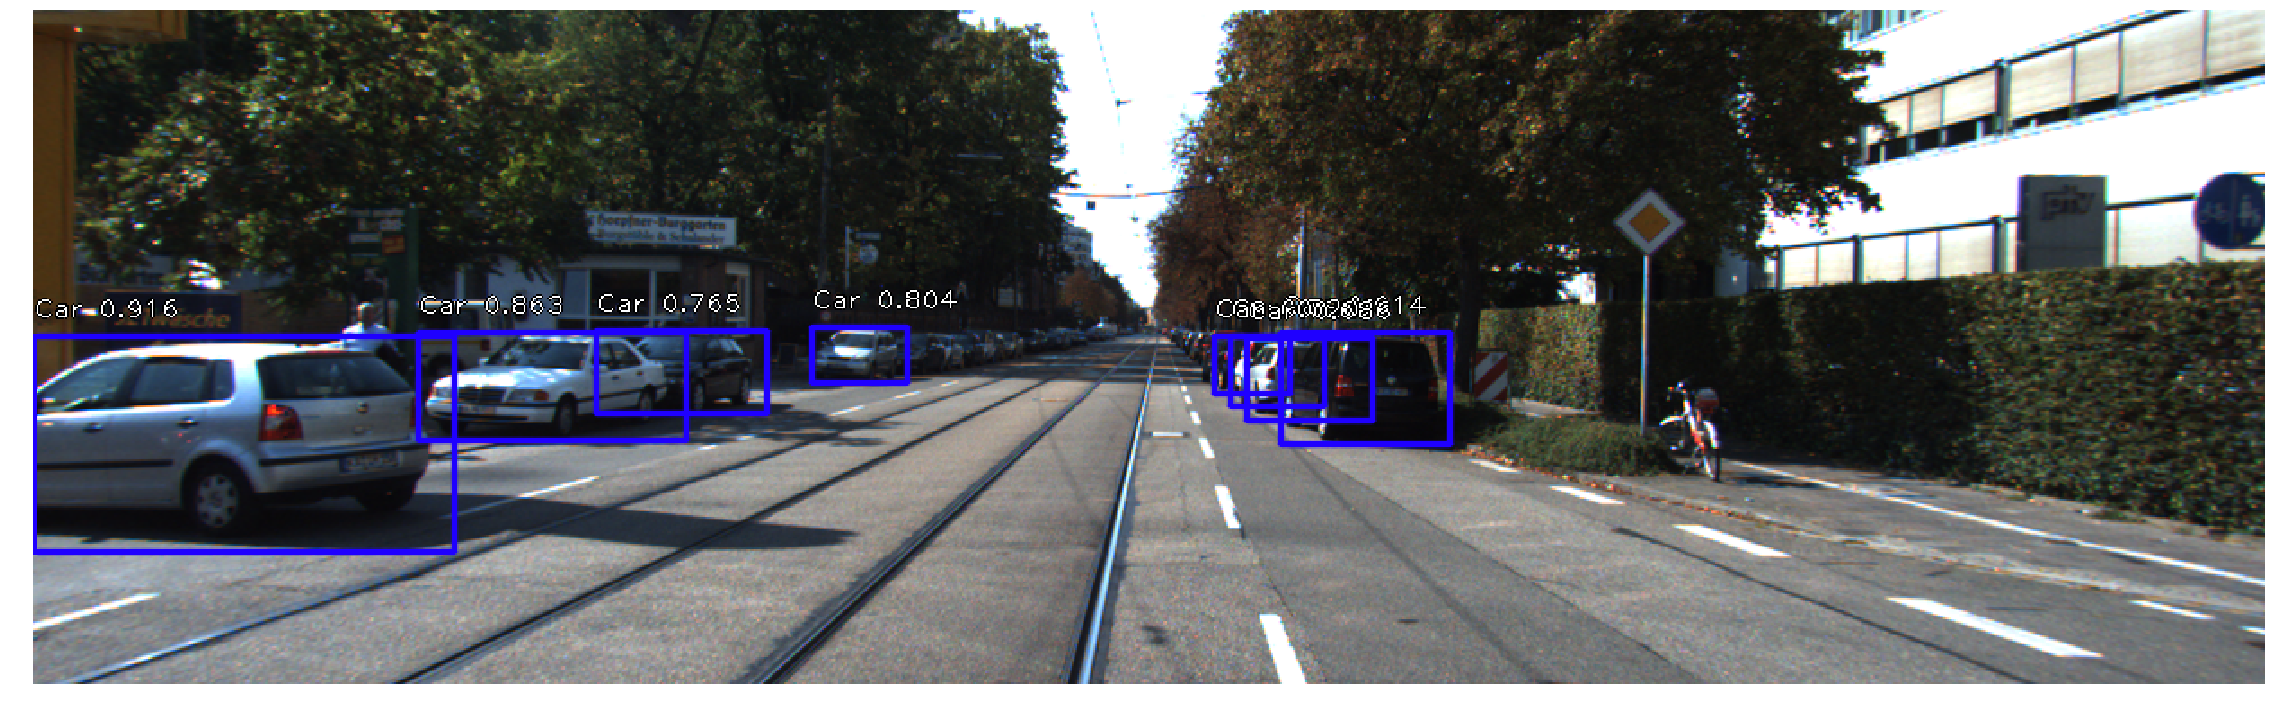

In [9]:
# load image
image = read_image_bgr('./images/001030.png')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.5 or label>0:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)
    
plt.figure(figsize=(40, 40))
plt.axis('off')
plt.imshow(draw)
plt.show()